In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#importing data
lrtr = pd.read_csv(r'C:\Users\sripu\OneDrive\Desktop\regression_train.csv')
lrtr

,data1,data2,data3,data4,data5,data6,data7,data8,data9,data10,output
0,8,279,C,14.451155,1139.0,1.0,9.302908,1.0,M,p,86.108947
1,1,108,H,14.207448,1656.0,1.0,7.220130,0.0,M,p,42.606833
2,8,258,A,19.220830,2817.0,1.0,8.727214,1.0,M,p,85.625961
3,4,147,A,15.752732,1948.0,1.0,6.078818,1.0,M,p,53.656277
4,5,230,H,10.195407,1336.0,1.0,4.749185,0.0,M,p,64.925051
...,...,...,...,...,...,...,...,...,...,...,...
9995,9,263,A,16.604215,1070.0,0.0,8.979149,2.0,F,p,85.922943
9996,5,280,E,28.758911,2652.0,0.0,3.574129,0.0,F,p,90.857149
9997,6,188,D,15.963267,1359.0,0.0,2.880019,0.0,F,p,61.246960
9998,1,132,H,11.683401,1793.0,0.0,6.983192,2.0,F,p,45.298253


In [3]:
#rows and colums
lrtr.shape

(10000, 11)

In [4]:
lrtr.columns

Index(['data1', 'data2', 'data3', 'data4', 'data5', 'data6', 'data7', 'data8',
       'data9', 'data10', 'output'],
      dtype='object')

In [5]:
#check info
lrtr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   data1   10000 non-null  int64  
 1   data2   10000 non-null  int64  
 2   data3   10000 non-null  object 
 3   data4   10000 non-null  float64
 4   data5   9999 non-null   float64
 5   data6   9997 non-null   float64
 6   data7   9998 non-null   float64
 7   data8   9999 non-null   float64
 8   data9   9999 non-null   object 
 9   data10  9999 non-null   object 
 10  output  9999 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 742.2+ KB


In [6]:
print(set(lrtr['data10']))

{nan, 'p'}


In [7]:
lrtr.drop('data10', axis = 1, inplace = True)

In [8]:
print(lrtr.shape,'\n')
print(lrtr.columns)

(10000, 10) 

Index(['data1', 'data2', 'data3', 'data4', 'data5', 'data6', 'data7', 'data8',
       'data9', 'output'],
      dtype='object')


In [9]:
print(set(lrtr['data3']))

{'D', 'G', 'B', 'E', 'A', 'H', 'F', 'C'}


In [10]:
#categorical to numaerical
lrtr.data3 = pd.Categorical(lrtr.data3,['F', 'G', 'E', 'B', 'D', 'C', 'H', 'A'], ordered = True)

In [11]:
print(lrtr.data3)

0       C
1       H
2       A
3       A
4       H
       ..
9995    A
9996    E
9997    D
9998    H
9999    A
Name: data3, Length: 10000, dtype: category
Categories (8, object): [F < G < E < B < D < C < H < A]


In [12]:
lrtr.data3 = lrtr.data3.cat.codes

In [13]:
lrtr['data3']

0       5
1       6
2       7
3       7
4       6
       ..
9995    7
9996    2
9997    4
9998    6
9999    7
Name: data3, Length: 10000, dtype: int8

In [14]:
#categorical to numaerical
print(set(lrtr['data3']))

{0, 1, 2, 3, 4, 5, 6, 7}


In [15]:
lrtr.data9 = pd.Categorical(lrtr.data9,['M','F'])

In [16]:
lrtr.data9 = lrtr.data9.cat.codes

In [17]:
lrtr['data9']

0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    1
9998    1
9999    1
Name: data9, Length: 10000, dtype: int8

In [18]:
lrtr

,data1,data2,data3,data4,data5,data6,data7,data8,data9,output
0,8,279,5,14.451155,1139.0,1.0,9.302908,1.0,0,86.108947
1,1,108,6,14.207448,1656.0,1.0,7.220130,0.0,0,42.606833
2,8,258,7,19.220830,2817.0,1.0,8.727214,1.0,0,85.625961
3,4,147,7,15.752732,1948.0,1.0,6.078818,1.0,0,53.656277
4,5,230,6,10.195407,1336.0,1.0,4.749185,0.0,0,64.925051
...,...,...,...,...,...,...,...,...,...,...
9995,9,263,7,16.604215,1070.0,0.0,8.979149,2.0,1,85.922943
9996,5,280,2,28.758911,2652.0,0.0,3.574129,0.0,1,90.857149
9997,6,188,4,15.963267,1359.0,0.0,2.880019,0.0,1,61.246960
9998,1,132,6,11.683401,1793.0,0.0,6.983192,2.0,1,45.298253


In [19]:
lrtr.isnull().sum()

data1     0
data2     0
data3     0
data4     0
data5     1
data6     3
data7     2
data8     1
data9     0
output    1
dtype: int64

In [20]:
lrtr.shape

(10000, 10)

In [21]:
lrtr.dropna(how = 'any', inplace = True)

In [22]:
lrtr.isnull().sum()

data1     0
data2     0
data3     0
data4     0
data5     0
data6     0
data7     0
data8     0
data9     0
output    0
dtype: int64

In [23]:
lrtr.shape

(9997, 10)

In [24]:
print(set())

set()


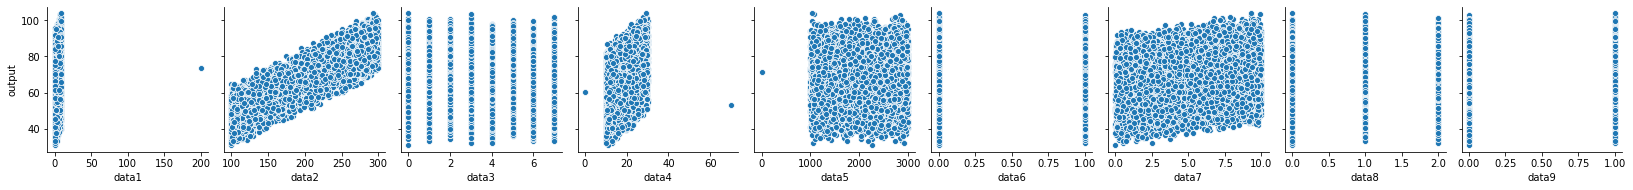

In [25]:
sns.pairplot(data = lrtr, x_vars = ['data1', 'data2', 'data3', 'data4', 'data5', 'data6', 'data7', 'data8', 'data9'], y_vars = ['output'])

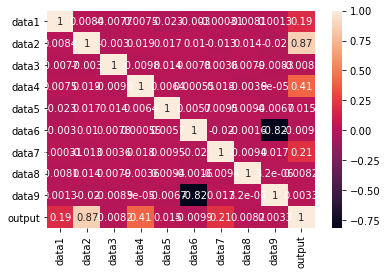

In [26]:
sns.heatmap(lrtr.corr(), annot = True)

In [27]:
lrtr

,data1,data2,data3,data4,data5,data6,data7,data8,data9,output
0,8,279,5,14.451155,1139.0,1.0,9.302908,1.0,0,86.108947
1,1,108,6,14.207448,1656.0,1.0,7.220130,0.0,0,42.606833
2,8,258,7,19.220830,2817.0,1.0,8.727214,1.0,0,85.625961
3,4,147,7,15.752732,1948.0,1.0,6.078818,1.0,0,53.656277
4,5,230,6,10.195407,1336.0,1.0,4.749185,0.0,0,64.925051
...,...,...,...,...,...,...,...,...,...,...
9995,9,263,7,16.604215,1070.0,0.0,8.979149,2.0,1,85.922943
9996,5,280,2,28.758911,2652.0,0.0,3.574129,0.0,1,90.857149
9997,6,188,4,15.963267,1359.0,0.0,2.880019,0.0,1,61.246960
9998,1,132,6,11.683401,1793.0,0.0,6.983192,2.0,1,45.298253


In [28]:
X =lrtr.iloc[:,0:9]
X

,data1,data2,data3,data4,data5,data6,data7,data8,data9
0,8,279,5,14.451155,1139.0,1.0,9.302908,1.0,0
1,1,108,6,14.207448,1656.0,1.0,7.220130,0.0,0
2,8,258,7,19.220830,2817.0,1.0,8.727214,1.0,0
3,4,147,7,15.752732,1948.0,1.0,6.078818,1.0,0
4,5,230,6,10.195407,1336.0,1.0,4.749185,0.0,0
...,...,...,...,...,...,...,...,...,...
9995,9,263,7,16.604215,1070.0,0.0,8.979149,2.0,1
9996,5,280,2,28.758911,2652.0,0.0,3.574129,0.0,1
9997,6,188,4,15.963267,1359.0,0.0,2.880019,0.0,1
9998,1,132,6,11.683401,1793.0,0.0,6.983192,2.0,1


In [29]:
X.shape

(9997, 9)

In [30]:
y = lrtr.iloc[:,-1]
y

0       86.108947
1       42.606833
2       85.625961
3       53.656277
4       64.925051
          ...    
9995    85.922943
9996    90.857149
9997    61.246960
9998    45.298253
9999    85.534604
Name: output, Length: 9997, dtype: float64

In [31]:
y.shape

(9997,)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.77, random_state = 100)
y_train.shape

(7697,)

In [33]:
X_train.shape

(7697, 9)

In [34]:
import sklearn
from sklearn.linear_model import LinearRegression

In [35]:
regressor = LinearRegression()

In [36]:
regressor.fit(X_train,y_train)

LinearRegression()

In [37]:
y_pred = regressor.predict(X_test)

In [38]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

1.2311043002739708

In [39]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9932720374474342

In [40]:
lrts = pd.read_csv(r'C:\Users\sripu\OneDrive\Desktop\regression_test.csv')

In [41]:
lrts

,data1,data2,data3,data4,data5,data6,data7,data8,data9,data10
0,7,195,A,29.038043,2725,1,6.145731,2,M,p
1,9,109,F,20.221431,1184,1,9.334184,2,M,p
2,0,126,C,26.477532,2975,1,9.021806,1,M,p
3,2,209,E,13.445450,1067,1,1.814993,0,M,p
4,5,268,B,25.065894,1336,1,1.639130,1,M,p
...,...,...,...,...,...,...,...,...,...,...
9995,7,251,D,23.004384,1637,0,8.333728,1,F,p
9996,5,275,A,29.514058,2339,0,9.953107,1,F,p
9997,8,168,C,22.520965,1827,0,7.555553,1,F,p
9998,4,296,E,16.558948,1748,0,8.846995,1,F,p


In [42]:
lrts.drop('data10', axis=1, inplace = True)

In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
lrts['data3'] = le.fit_transform(lrts['data3'])
lrts['data9'] = le.fit_transform(lrts['data9'])
lrts


,data1,data2,data3,data4,data5,data6,data7,data8,data9
0,7,195,0,29.038043,2725,1,6.145731,2,1
1,9,109,5,20.221431,1184,1,9.334184,2,1
2,0,126,2,26.477532,2975,1,9.021806,1,1
3,2,209,4,13.445450,1067,1,1.814993,0,1
4,5,268,1,25.065894,1336,1,1.639130,1,1
...,...,...,...,...,...,...,...,...,...
9995,7,251,3,23.004384,1637,0,8.333728,1,0
9996,5,275,0,29.514058,2339,0,9.953107,1,0
9997,8,168,2,22.520965,1827,0,7.555553,1,0
9998,4,296,4,16.558948,1748,0,8.846995,1,0


In [47]:
lrts.isnull().sum()

data1    0
data2    0
data3    0
data4    0
data5    0
data6    0
data7    0
data8    0
data9    0
dtype: int64

In [48]:
y_test_pred = regressor.predict(lrts)
test_output = pd.DataFrame({"test_output": y_test_pred})
test_output

,test_output
0,77.585134
1,56.960109
2,60.053236
3,59.050772
4,82.868685
...,...
9995,85.283424
9996,96.279803
9997,68.097645
9998,87.235954


In [49]:
lrts['test_output']=test_output
lrts.head()

,data1,data2,data3,data4,data5,data6,data7,data8,data9,test_output
0,7,195,0,29.038043,2725,1,6.145731,2,1,77.585134
1,9,109,5,20.221431,1184,1,9.334184,2,1,56.960109
2,0,126,2,26.477532,2975,1,9.021806,1,1,60.053236
3,2,209,4,13.445450,1067,1,1.814993,0,1,59.050772
4,5,268,1,25.065894,1336,1,1.639130,1,1,82.868685
